## Plot raw waveforms and spectrograms to pinpoint noise

### Import libraries

In [6]:
import pandas as pd
from obspy import read,UTCDateTime
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

# Import functions
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moon2data import *

### Load moonquake catalog

In [7]:
mqdir = '../catalogs/final_catalogs/'
cat = pd.read_csv(mqdir + 'A17_moonquakes_catalog_HQ_final.csv')

### Set inputs to obtain waveforms

In [8]:
parentdir = '/data/ytamama/Apollo17/LSPE_data/sac_volts_ds/'
minfreq = ''
maxfreq = ''
befwin = 15
aftwin = 45

### Select an event and obtain waveforms

In [9]:
# LM event
evid = '760929-09-M2'
row = cat.loc[(cat.evid == evid) & (cat.geophone == 1)].iloc[0]

# Unfiltered data
arrtime = datetime.strptime(row.picktime_SNR,'%Y-%m-%d %H:%M:%S.%f')
st = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes = st.traces[0].times() 
trdata = st.traces[0].data

# Filtered version
st_filt = moon2sac(arrtime,1,befwin,aftwin,3,35,parentdir)
trtimes_filt = st_filt.traces[0].times() 
trdata_filt = st_filt.traces[0].data

### Plot waveform and spectrogram

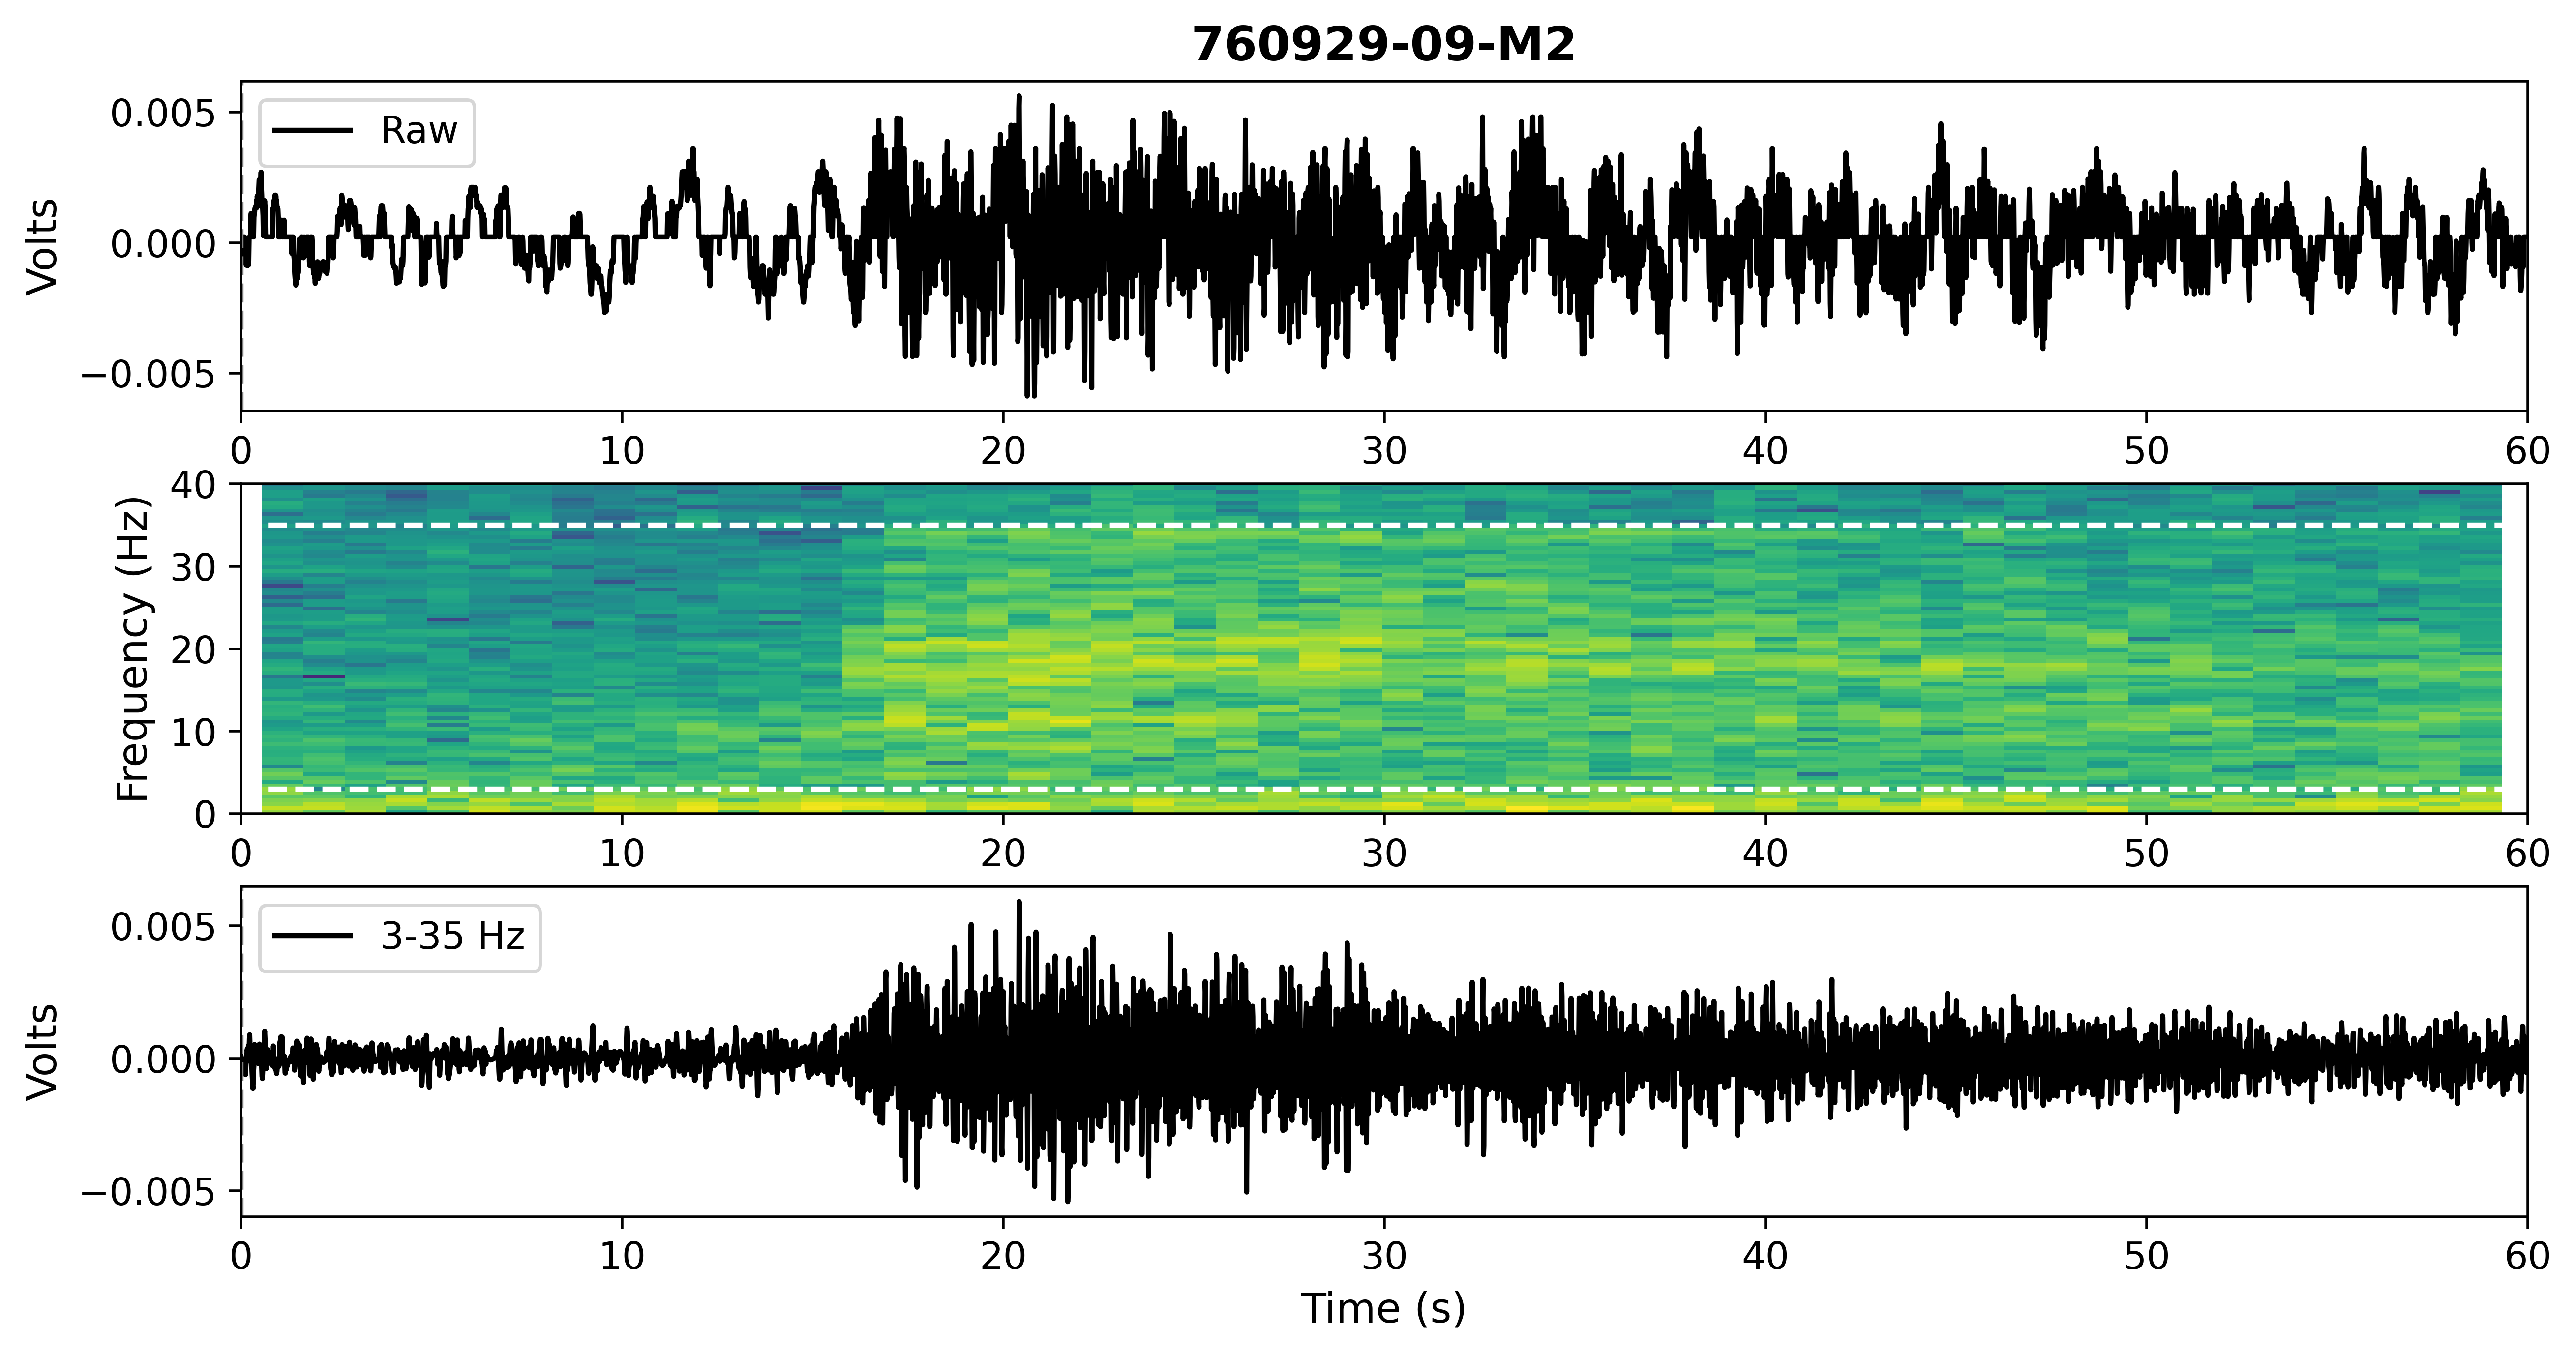

In [11]:
# Initialize figure
fig,axs = plt.subplots(3,1,figsize=(12,6), dpi=500)

# Plot waveform
ax1 = axs[0]
ax1.plot(trtimes,trdata,color='black',label='Raw')
ax1.set_xlim([0,befwin+aftwin])
ax1.set_ylabel('Volts',fontsize=12)
ax1.tick_params(axis='both',labelsize=11)
ax1.set_title(f'{evid}',fontweight='bold',fontsize=14)
ax1.axvline(x = 0,linestyle='--',color='grey')
ax1.legend(loc='upper left',fontsize=11)

# Plot spectrogram
ax2 = axs[1]
fs = 117.6
Pxx, freqs, bins, im = ax2.specgram(x = trdata, Fs = fs)
ax2.set_xlim([0,befwin+aftwin])
ax2.axhline(y = 3, color='white', linestyle='--')
ax2.axhline(y = 35, color='white', linestyle='--')
ax2.set_ylim([0, 40])
ax2.set_ylabel('Frequency (Hz)',fontsize=12)
ax2.tick_params(axis='both',labelsize=11)

# Plot filtered waveform
ax3 = axs[2]
ax3.plot(trtimes_filt,trdata_filt,color='black',label='3-35 Hz')
ax3.set_xlim([0,befwin+aftwin])
ax3.set_ylabel('Volts',fontsize=12)
ax3.tick_params(axis='both',labelsize=11)
ax3.axvline(x = 0,linestyle='--',color='grey')
ax3.set_xlabel('Time (s)',fontsize=12)
ax3.legend(loc='upper left',fontsize=11)
plt.subplots_adjust(hspace = 0.22)